In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import _pickle as pickle
from PIL import Image
import os

import requests
import cv2

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

In [2]:
from bechdelai.vision.image import Image

# TODO


- Récupérer le code d'analyse des étudiants 
- RetinaFace ? 
- Récupérer les posters

# Ressources
- https://github.com/serengil/deepface
- https://github.com/serengil/retinaface

# Récupérer les posters

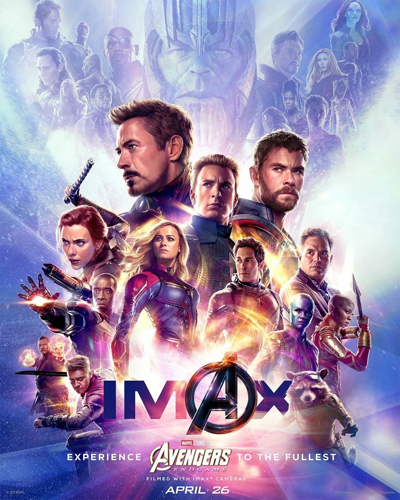

In [3]:
image = Image("./avengers-endgame-poster-imax.jpg")
image.resize(width = 400)
image

# Analyser un poster

In [6]:
from retinaface import RetinaFace

## Récupérer les visages

In [43]:
rois = RetinaFace.detect_faces(image.array)
faces = RetinaFace.extract_faces(image.array,align = True)

faces = [Image(array = x[:,:,[2,1,0]]) for x in faces]

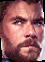

In [45]:
faces[0]

## Afficher les visages

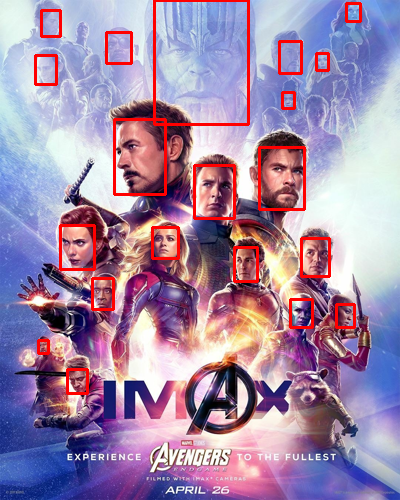

In [35]:
img_copy = np.copy(image.array)

for _,values in rois.items():
    (x,y,x2,y2) = values["facial_area"]
    cv2.rectangle(img_copy,(x,y),(x2,y2),(255,0,0),2)

Image(array = img_copy)

## Détecter le genre

In [36]:
from deepface import DeepFace

In [47]:
obj = DeepFace.analyze(faces[1].array,enforce_detection=False)
obj

Action: race: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.16it/s]


{'emotion': {'angry': 1.2302773469355885,
  'disgust': 4.417295972431186,
  'fear': 2.617077776243952,
  'happy': 4.825325270335239e-05,
  'sad': 91.27869709984098,
  'surprise': 1.0112000341768991e-05,
  'neutral': 0.45659001130282745},
 'dominant_emotion': 'sad',
 'region': {'x': 0, 'y': 0, 'w': 75, 'h': 51},
 'age': 44,
 'gender': 'Man',
 'race': {'asian': 16.233554482460022,
  'indian': 6.289184093475342,
  'black': 1.0813572444021702,
  'white': 20.946505665779114,
  'middle eastern': 6.887399405241013,
  'latino hispanic': 48.56199622154236},
 'dominant_race': 'latino hispanic'}

# Analyser plusieurs posters

## Récupérer plusieurs posters d'un coup

## Analyse massive des posters